[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1UM8e_IzoAF-LKrwEt5-vEdsyKyg90DZf#scrollTo=H-z4QGlO8DC1)
# Proyek Analisis Data: [Bike Sharing Dataset]

---


- **Nama:** [I Made Rama Dwijaya]
- **Email:** [dwijayaaa21@gmail.com]
- **ID Dicoding:** [MS060D5Y0511]

## Menentukan Pertanyaan Bisnis

- Bagaimana Tren Penggunaan Sepeda Berdasarkan Waktu ?
- Faktor-Faktor Utama apa saja yang Memengaruhi Penyewaan Sepeda Harian ?

## Import Semua Packages/Library yang Digunakan

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
day_df = pd.read_csv("https://raw.githubusercontent.com/MadeRama21/datasetBikeSharing/refs/heads/main/day.csv")
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/MadeRama21/datasetBikeSharing/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [9]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Membersihkan tabel `day_df`

#####  Duplicate Data

In [ ]:
day_df.duplicated().sum()

0

##### Missing Values

In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


##### inaccurate value

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Membersihkan Tabel `hour_df`

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Memperbaiki tipe data

In [ ]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore `day_df` dan `hour_df`

In [30]:
season_stats = day_df.groupby('season').agg({
    'cnt': ['sum', 'mean', 'std']
})
season_stats.columns = ['cnt_sum', 'cnt_mean', 'cnt_std']
print("Statistik Penyewaan Sepeda Berdasarkan Musim:")
print(season_stats)

Statistik Penyewaan Sepeda Berdasarkan Musim:
        cnt_sum     cnt_mean      cnt_std
season                                   
1        471348  2604.132597  1399.942119
2        918589  4992.331522  1695.977235
3       1061129  5644.303191  1459.800381
4        841613  4728.162921  1699.615261


**Insight:**
- Musim Gugur (index 3) menunjukkan total penyewaan tertinggi dengan 1,061,129   penyewaan sepeda, yang lebih tinggi dari Musim Panas. Selain itu, rata-rata penyewaan pada Musim Gugur adalah 5,644, yang juga merupakan yang tertinggi.

In [29]:
hourly_stats = hour_df.groupby(by="hr").agg({
    "cnt": ["sum", "mean", "std"]
})
hourly_stats.columns = ['cnt_sum', 'cnt_mean', 'cnt_std']
hourly_stats = hourly_stats.sort_index(ascending=True)
print("Statistik Penyewaan Sepeda Berdasarkan Jam:")
print(hourly_stats)

Statistik Penyewaan Sepeda Berdasarkan Jam:
    cnt_sum    cnt_mean     cnt_std
hr                                 
0     39130   53.898072   42.307910
1     24164   33.375691   33.538727
2     16352   22.869930   26.578642
3      8174   11.727403   13.239190
4      4428    6.352941    4.143818
5     14261   19.889819   13.200765
6     55132   76.044138   55.084348
7    154171  212.064649  161.441936
8    261001  359.011004  235.189285
9    159438  219.309491   93.703458
10   126257  173.668501  102.205413
11   151320  208.143054  127.495536
12   184414  253.315934  145.081134
13   184919  253.661180  148.107657
14   175652  240.949246  147.271574
15   183149  251.233196  144.632541
16   227748  311.983562  148.682618
17   336860  461.452055  232.656611
18   309772  425.510989  224.639304
19   226789  311.523352  161.050359
20   164550  226.030220  119.670164
21   125445  172.314560   89.788893
22    95612  131.335165   69.937782
23    63941   87.831044   50.846889


**Insight:**
- Jam 8 pagi (hr = 8) menunjukkan jumlah penyewaan tertinggi, dengan total penyewaan sebesar 261,001 dan rata-rata penyewaan sebesar 359. Ini menunjukkan bahwa pada pagi hari banyak orang yang menggunakan sepeda, kemungkinan untuk pergi bekerja atau melakukan aktivitas lainnya.
- Jam 5 sore (hr = 17) juga memiliki jumlah penyewaan yang sangat tinggi, dengan 336,860 total penyewaan dan rata-rata penyewaan sebesar 461. Ini menunjukkan bahwa setelah jam kerja, penyewaan sepeda meningkat, mungkin karena orang-orang menggunakan sepeda untuk pulang atau berolahraga.

In [15]:
comparison_stats = day_df.groupby(by="season").agg({
    "temp": ["max", "min", "mean", "std"],
    "cnt": ["max", "min", "mean", "std"]
})
print("Statistik Perbandingan Suhu dan Penyewaan Sepeda Berdasarkan Musim:")
print(comparison_stats)

Statistik Perbandingan Suhu dan Penyewaan Sepeda Berdasarkan Musim:
            temp                                 cnt                     \
             max       min      mean       std   max   min         mean   
season                                                                    
1       0.572500  0.059130  0.297748  0.102735  7836   431  2604.132597   
2       0.808333  0.253043  0.544405  0.122650  8362   795  4992.331522   
3       0.861667  0.469167  0.706309  0.070848  8714  1115  5644.303191   
4       0.657500  0.220833  0.422906  0.107834  8555    22  4728.162921   

                     
                std  
season               
1       1399.942119  
2       1695.977235  
3       1459.800381  
4       1699.615261  


**Insight:**
- Musim gugur memiliki rentang penyewaan tertinggi (8714 - 1115 = 7599), menunjukkan bahwa aktivitas penyewaan sangat bervariasi di musim ini.
- Musim dingin memiliki rentang penyewaan paling ekstrem (8555 - 22 = 8533), yang menunjukkan adanya hari-hari dengan penyewaan sangat rendah di musim dingin.

## Visualization & Explanatory Analysis

:### Pertanyaan 1: Bagaimana Tren Penggunaan Sepeda Berdasarkan Waktu ?

     

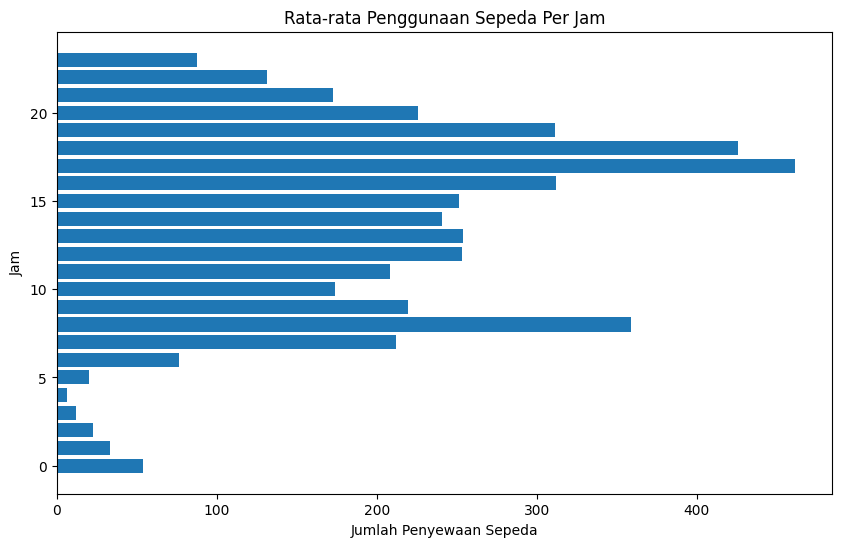

In [22]:

hourly_summary = hour_df.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.barh(hourly_summary['hr'], hourly_summary['cnt'])
plt.title("Rata-rata Penggunaan Sepeda Per Jam")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Jam")
plt.show()

**Insight:**
- Penggunaan sepeda rata rata meningkat drastis saat jam 5 pagi keatas, kemungkinan orang mulai beraktifitas di jam 5 keatas
- Penggunaan sepeda rata rata meningkat drastis lagi saat memasuki jam 4 sore, kemungkinan karena orang pergi keluar disaat jam 4 sore keatas
- Penggunaan sepeda rata rata menurun perlahan saat jam 7 malam keatas, kemungkinan karena orang sudah selesai beraktifitas

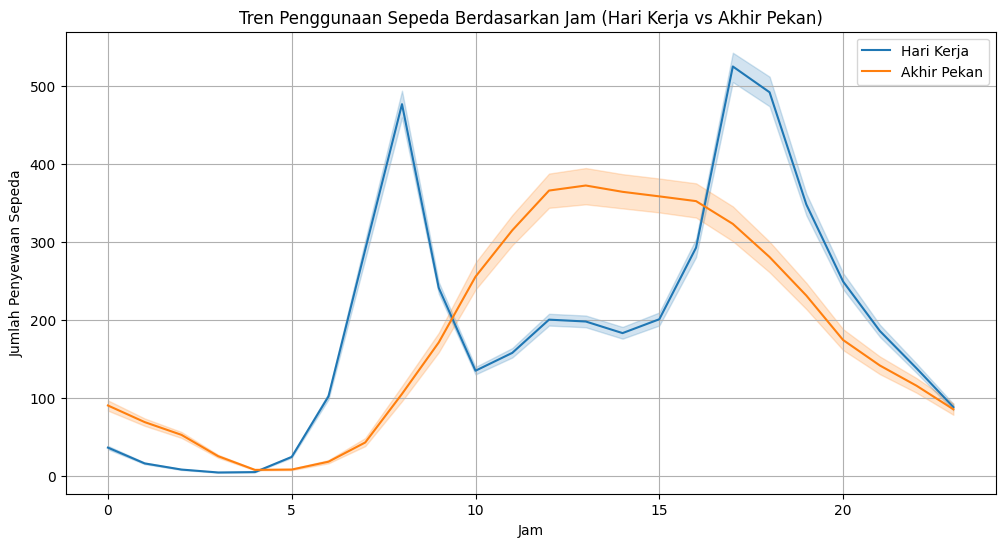

In [23]:

weekday_data = hour_df[hour_df['workingday'] == 1]
weekend_data = hour_df[hour_df['workingday'] == 0]
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=weekday_data, label='Hari Kerja')
sns.lineplot(x='hr', y='cnt', data=weekend_data, label='Akhir Pekan')
plt.title("Tren Penggunaan Sepeda Berdasarkan Jam (Hari Kerja vs Akhir Pekan)")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.legend()
plt.grid(True)
plt.show()

**Insight:**
- Pagi sekitar jam 5 keatas traficnya meningkat drastis di Hari kerja, kemungkinan besar karena orang pergi bekerja.
- Sore sekitar jam 4 keatas traficnya meningkat drastis di Hari kerja, kemungkinan besar karena orang pulang bekerja.
- Pagi jam 6 keatas traficnya naik perlahan di Akhir pekan sampai jam 3 sore, kemungkinan orang bersantai naik sepeda di akhir pekan
- Setelah lewat dari jam 8 malam trafic nya menurun perlahan disemua hari, kemungkinan orang sudah pulang kerumah masing masing

### Pertanyaan 2: Faktor-Faktor Utama apa saja yang Memengaruhi Penyewaan

1.   List item
2.   List item

Sepeda Harian ?

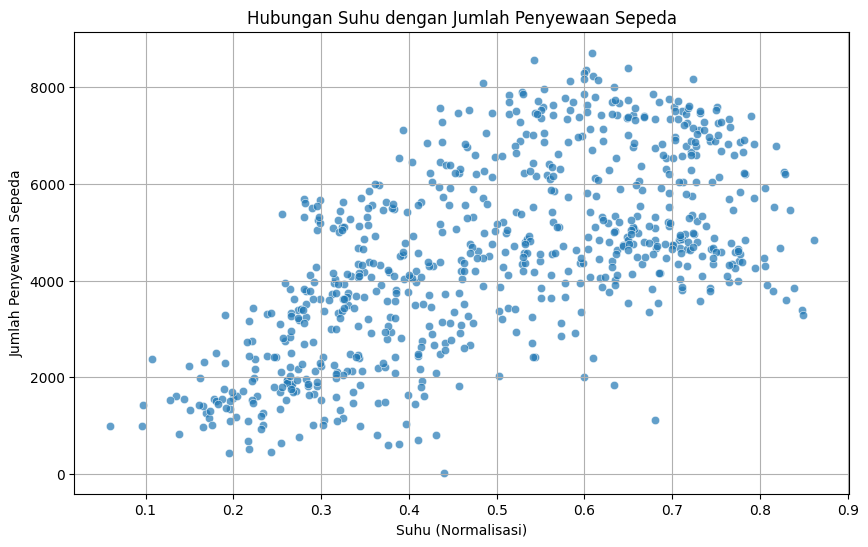

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=day_df, alpha=0.7)
plt.title("Hubungan Suhu dengan Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu (Normalisasi)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.grid(True)
plt.show()

**Insight:**
- Suhu memiliki hubungan positif dengan penyewaan sepeda, tetapi hanya sampai titik tertentu
- Penyewaan sepeda rendah saat suhu terlalu dingin atau panas

Text(0.5, 1.0, 'Heatmap Korelasi Antar Variabel')

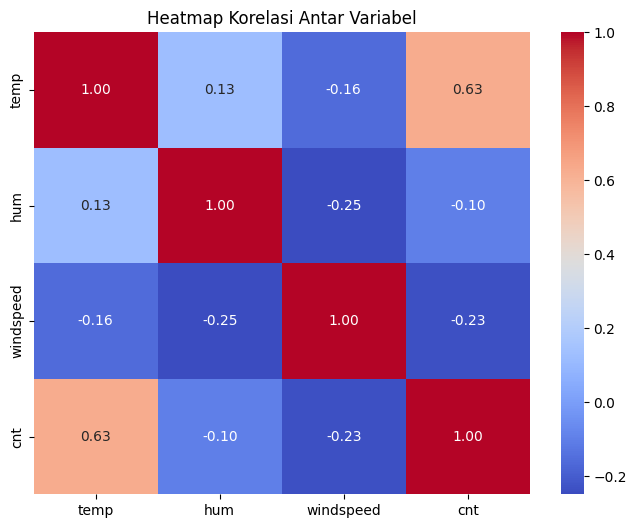

In [ ]:
correlation = day_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")

**Insight:**
- Korelasi antara suhu (temp) dan jumlah penyewaan sepeda (cnt) adalah 0.67 yang berarti suhu cukup mempengaruhi jumlah penyewaan sepeda

## Conclusion

- Pada hari kerja, penggunaan sepeda didominasi oleh perjalanan kerja atau aktivitas rutin lainnya, dengan lonjakan drastis pada pukul 6 pagi dan 6 sore yang mencerminkan jam berangkat dan pulang kerja. Sementara pada akhir pekan, penggunaan sepeda lebih banyak untuk rekreasi dengan pola yang lebih stabil sepanjang siang hingga sore tanpa lonjakan signifikan seperti di hari kerja.
- Kesimpulan untuk pertanyaan kedua, naik turunnya suhu memiliki peran yang cukup kuat dalam orang melakukan penyewaan sepeda, dengan korelasi positif (0.63), Ini menunjukkan bahwa ketika suhu lebih tinggi, penyewaan sepeda cenderung lebih banyak. Seperti yang diharapkan, suhu yang lebih hangat mendorong orang untuk bersepeda lebih sering.
